In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('df_final_with10.csv')

In [7]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [28]:
data

,Day,Month,Humidity,Wind,Rain,DMC,DC,Spread,Region,Classes
0,27,9,87,15,4.4,6.5,8.0,0.1,0,0
1,13,9,86,21,4.6,1.3,7.5,0.1,1,0
2,1,9,86,16,0.0,0.9,8.2,0.1,0,0
3,20,6,80,16,0.4,3.4,27.1,0.9,1,0
4,14,6,79,16,0.7,6.4,7.3,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...
270,19,9,41,8,0.1,24.9,86.0,2.7,0,1
271,21,9,34,17,0.0,23.6,97.3,13.8,0,1
272,22,9,64,13,0.0,26.1,106.3,7.1,0,1
273,23,9,56,14,0.0,29.4,115.6,7.5,0,1


In [18]:
X_columns  = ['Humidity', 'Wind', 'Rain', 'DMC', 'DC', 'Spread']
X_scale = data[X_columns]

In [19]:
#scaling data
df = data.copy()
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()


X_part = pd.DataFrame(sc_X.fit_transform(X_scale), columns = X_columns)


In [20]:
X_part.head()

,Humidity,Wind,Rain,DMC,DC,Spread
0,1.524173,-0.169757,1.645673,-0.585940,-0.789306,-1.025506
1,1.459038,1.984852,1.738773,-1.025803,-0.799935,-1.025506
2,1.459038,0.189344,-0.402531,-1.059638,-0.785054,-1.025506
3,1.068224,0.189344,-0.216331,-0.848166,-0.383266,-0.830138
4,1.003089,0.189344,-0.076681,-0.594399,-0.804187,-0.927822


In [22]:
df = data.copy()
df.drop(X_columns,axis = 1, inplace = True)

In [25]:
df_new = df.join(X_part)

In [26]:
col_order = data.columns
df_new = df_new[col_order]

In [27]:
df_new

,Day,Month,Humidity,Wind,Rain,DMC,DC,Spread,Region,Classes
0,27,9,1.524173,-0.169757,1.645673,-0.585940,-0.789306,-1.025506,0,0
1,13,9,1.459038,1.984852,1.738773,-1.025803,-0.799935,-1.025506,1,0
2,1,9,1.459038,0.189344,-0.402531,-1.059638,-0.785054,-1.025506,0,0
3,20,6,1.068224,0.189344,-0.216331,-0.848166,-0.383266,-0.830138,1,0
4,14,6,1.003089,0.189344,-0.076681,-0.594399,-0.804187,-0.927822,0,0
...,...,...,...,...,...,...,...,...,...,...
270,19,9,-1.472065,-2.683467,-0.355981,0.970497,0.868867,-0.390559,0,1
271,21,9,-1.928014,0.548446,-0.402531,0.860531,1.109090,2.320176,0,1
272,22,9,0.026054,-0.887960,-0.402531,1.072004,1.300417,0.683967,0,1
273,23,9,-0.495031,-0.528859,-0.402531,1.351147,1.498123,0.781651,0,1


In [29]:
X = df_new.drop('Classes', axis = 1)
y = df_new['Classes']

In [30]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [32]:
knn_cv.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1], dtype=int64)

In [33]:

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8689189189189189
Best Parameters: {'n_neighbors': 1}


In [34]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [35]:
print(train_scores)
print(test_scores)

[1.0, 0.9453551912568307, 0.9508196721311475, 0.912568306010929, 0.8688524590163934, 0.825136612021858, 0.8633879781420765, 0.8633879781420765, 0.8469945355191257, 0.8469945355191257, 0.8306010928961749, 0.8360655737704918, 0.8306010928961749, 0.8579234972677595]
[0.8586956521739131, 0.8260869565217391, 0.8478260869565217, 0.8586956521739131, 0.8586956521739131, 0.8369565217391305, 0.8369565217391305, 0.8478260869565217, 0.8043478260869565, 0.8043478260869565, 0.8260869565217391, 0.8260869565217391, 0.8152173913043478, 0.8043478260869565]


max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

In [43]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 85.86956521739131 % and k = [1, 4, 5]


In [38]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1], dtype=int64)

In [44]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,40,6,46
1,12,34,46
All,52,40,92


Text(0.5, 15.0, 'Predicted label')

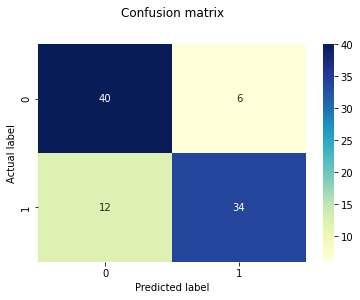

In [45]:
# Creating a Heatmap for the confusion matrix. 
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        46
           1       0.85      0.74      0.79        46

    accuracy                           0.80        92
   macro avg       0.81      0.80      0.80        92
weighted avg       0.81      0.80      0.80        92

